In [1]:
import pandas as pd #To convert the data into dataframe. 
import numpy as np#To convert the data to array.

# Data Cleaning

In [2]:
#Reading the Dataframe from the device using Pandas.
df = pd.read_csv(r'C:\Users\VIVEK\OneDrive\Desktop\crop_production.csv')

In [3]:
#Head() is used to print the dataframe in Top_down approach based on the argument provided.
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
#Tail() is used to print the data in bottom_up approach based on argument provided .
df.tail(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.0
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.0
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.0
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [10]:
#isnull() is used find whether the null values are present in it (or) not.
#sum() is used to sum up the no.of null values.
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
#if at all we don't drop the null values we won't able to achieve the perefect plotting in Data visualization.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [12]:
#dropna is used to drop the NULL values with its respective row.
#Advantage of dropna is we will be able to obtain accurate data/
data=df.dropna()
print(data.shape)
#print(data.head(50))#data without null values.
#Retrieve the null values.
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)#data with null values used for prediction.
#print(test.head(50))

(242361, 7)
(3730, 6)


In [13]:
test.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00


In [14]:
#To cross check whether the null values are dropped or not.
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [15]:
#You can view the the non_null values didn't differ.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [11]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\VIVEK\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#to check the whether the column is added or not. 
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visualization

In [13]:
#Packages used for datavisualizations
import matplotlib.pyplot as plt
import seaborn as sns

Lineplotgraph on two different Attributes

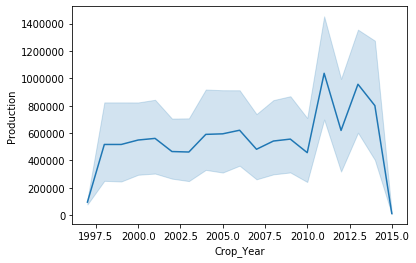

In [14]:
#Here plotting is made to know the production rate in every year.
sns.lineplot(data["Crop_Year"],data["Production"])

BarplotGraph on two different attributes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

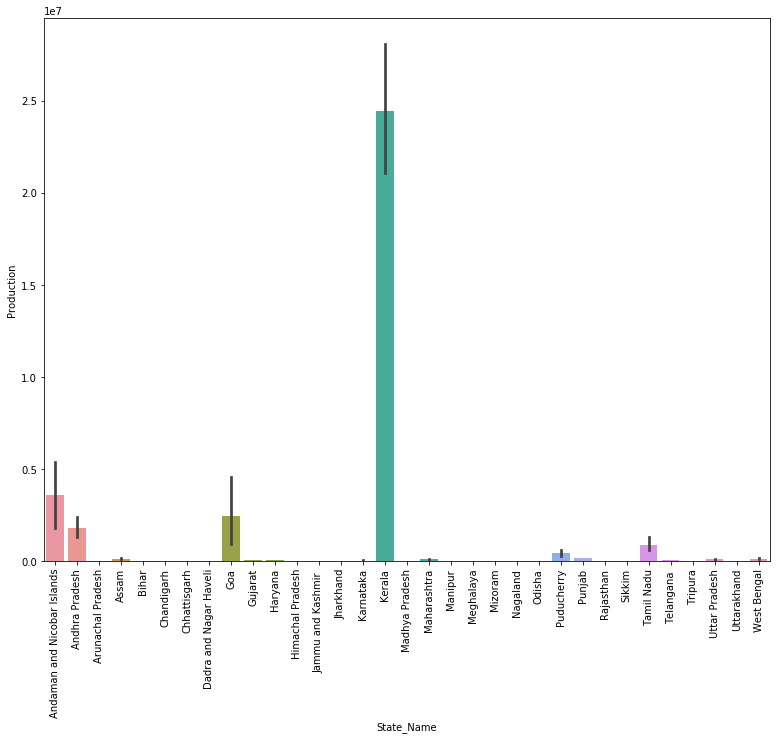

In [15]:
#Here plotting is made to know the production rate withrespect the states.
plt.figure(figsize=(13,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

We will be choosing a specific crop and perform the visualization on the necessities for that specific crop.

In [16]:
# count() functon is used to count the no.of entities of that particular attribute.
data['Crop'].count()

242361

In [17]:
#value_counts() is used to count the no.of data in terms of unique entity for a given attribute. 
data['Crop'].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Pear                     6
Plums                    6
Peach                    4
Apple                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [18]:
#Sorting the values interms of highest Production for the no.of crops.
Top_crop = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
Top_crop[:10]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08


# Considering a specific crop("Rice") we will be performing the challenges on it. 

In [19]:
#The details of the chosen crop.
Rice_df = data[data["Crop"]=="Rice"]
Rice_df[:3]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


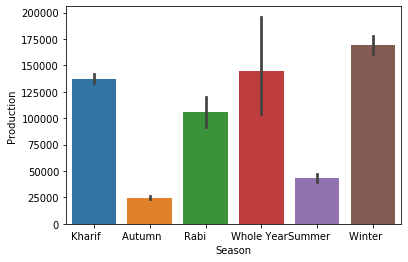

In [20]:
#Barplot made on the basis of production and season for a specific crop. 
sns.barplot("Season","Production",data =Rice_df)

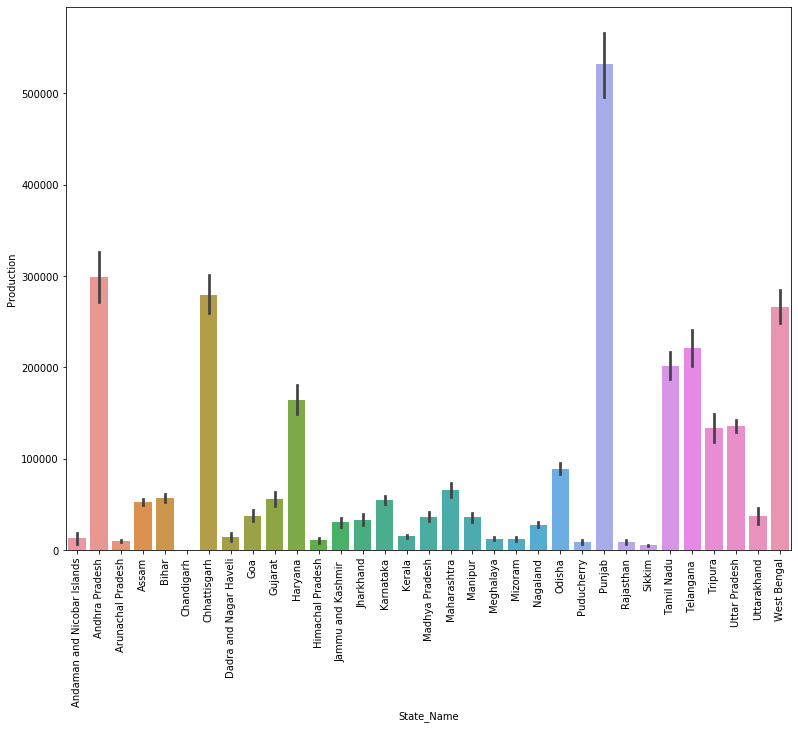

In [21]:
#Barplot made on the basis of season and production for a specific crop.
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=Rice_df)
plt.xticks(rotation=90)
plt.show()

In [22]:
#Dataset is made based on the highest Rice producing districts.
top_rice_pro_dis = Rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]

,District_Name,Production
58,BARDHAMAN,34239976.0
374,MEDINIPUR WEST,29192719.0
612,WEST GODAVARI,27845309.0
169,EAST GODAVARI,24690929.0
494,SANGRUR,24448000.0
325,KRISHNA,20280606.0
90,BIRBHUM,19753571.0
347,LUDHIANA,18950000.0
386,MURSHIDABAD,18403217.0
214,GUNTUR,18245831.0


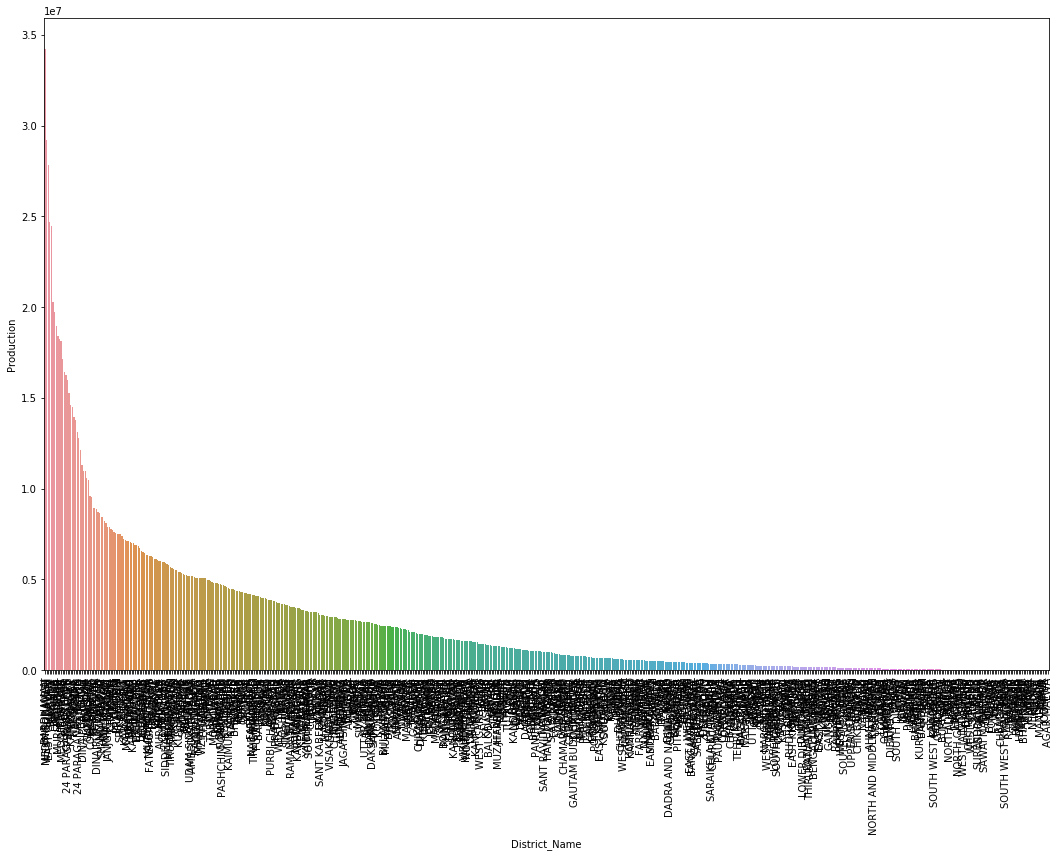

In [23]:
#Barplot made based on the district dataset of highest rice producing.
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

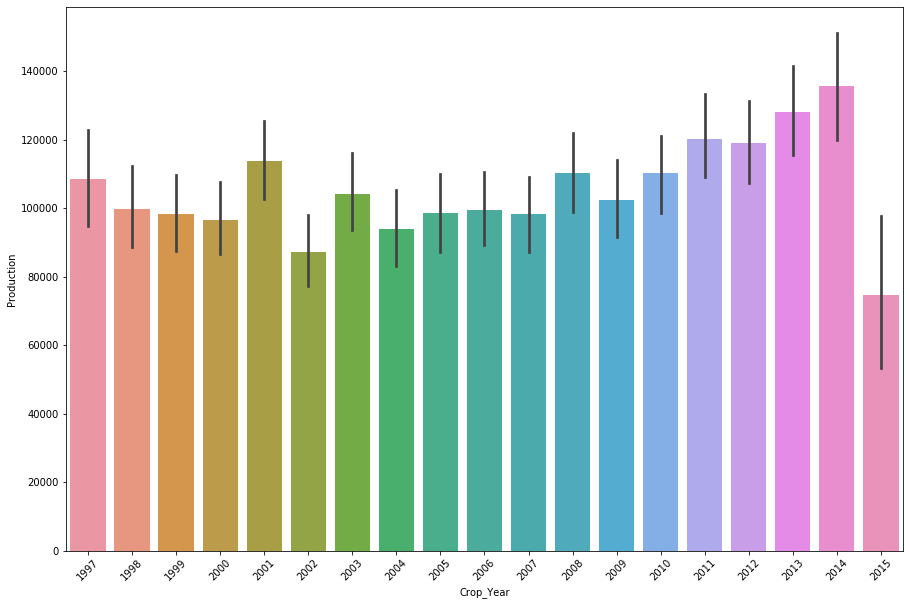

In [24]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=Rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

 Hence, the Rice Production depends on Season, State, Area,CropYear.

# Exploratory Data Analysis 

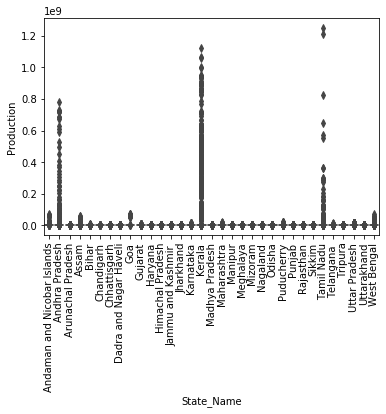

In [25]:
sns.boxplot(x=df["State_Name"],y=df["Production"])
plt.xticks(rotation=90)
plt.show()

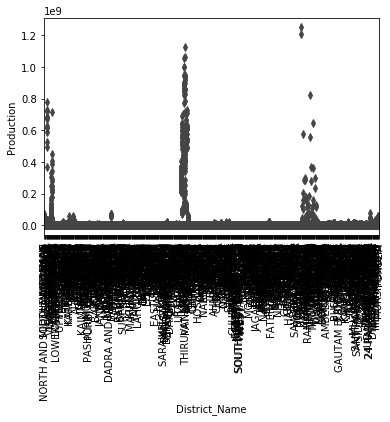

In [26]:
sns.boxplot(x=df["District_Name"],y=df["Production"])
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

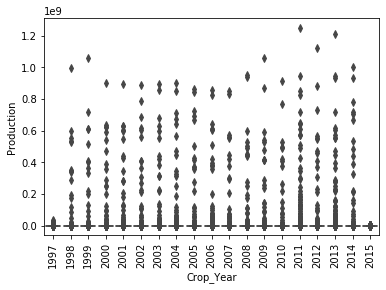

In [27]:
sns.boxplot(x=df["Crop_Year"],y=df["Production"])
plt.xticks(rotation=90)


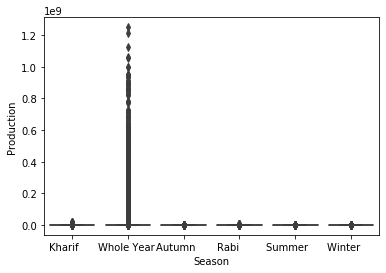

In [28]:
sns.boxplot(x=df["Season"],y=df["Production"])

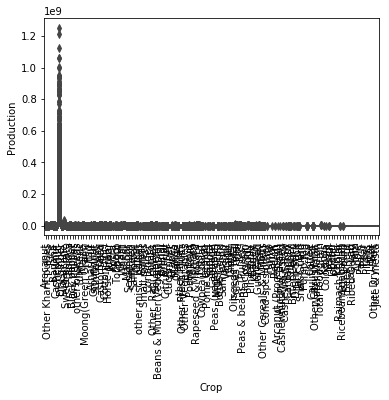

In [29]:
sns.boxplot(x=df["Crop"],y=df["Production"])
plt.xticks(rotation=90)
plt.show()

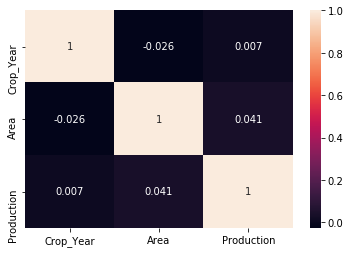

In [30]:
#Correlation  among the attributes
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True)

In [31]:
df["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

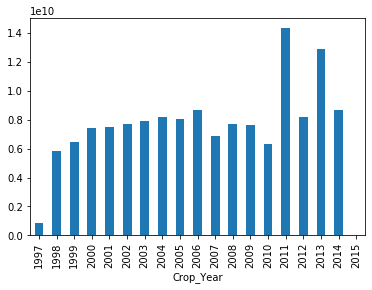

In [32]:
plt.tick_params(labelsize=10)
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

year 2011 has higher production

In [33]:
cc=df['Crop']
def cat_crop(cc):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar']:
        if cc==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)']:
        if cc==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if cc==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram']:
        if cc==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion']:
        if cc==i:
            return 'Vegetables'
    for i in ['Perilla','Colocosia','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies']:
      if cc==i:
            return 'Species'
    for i in ['Jobster','Cond-spcs other']:
        if cc==i:
            return 'Other'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)']:
        if cc==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if cc==i:
            return 'Nuts'
    for i in ['Rubber']:
        if cc==i:
            return 'Natural Polymer'
    for i in ['Coffee']:
        if cc== i:
            return 'Coffee'
    for i in ['Tea']:
        if cc==i:
            return 'Tea'
    for i in ['Total foodgrain']:
      if cc==i:
            return 'Total foodgrain'
    for i in ['Pulses total']:
        if cc==i:
            return 'Pulses total'
    for i in ['Oilseeds total']:
        if cc==i:
            return 'Oilseeds total'
    for i in ['Paddy']:
        if cc==i:
            return 'Paddy'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum']:
        if cc==i:
            return 'Oilseeds'
    for i in ['Sannhamp']:
        if cc==i:
          return 'Fertile Plant'
    for i in ['Tobacco']:
        if cc==i:
            return 'Commercial'
    for i in ['Sugarcane']:
        if cc==i:
            return 'Sugarcane'

In [34]:
df['cat_crop']=df['Crop'].apply(cat_crop)

In [35]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [36]:
df["cat_crop"].value_counts()

Cereal             63124
Pulses             34062
Oilseeds           34028
Species            21979
Vegetables         21728
Beans              18302
Nuts               11588
Sugarcane           7921
fibres              7800
Fruits              6243
Commercial          2698
Fertile Plant       2395
Paddy                479
Oilseeds total       426
Pulses total         266
Total foodgrain      188
Tea                   62
Natural Polymer       29
Other                 27
Coffee                 6
Name: cat_crop, dtype: int64

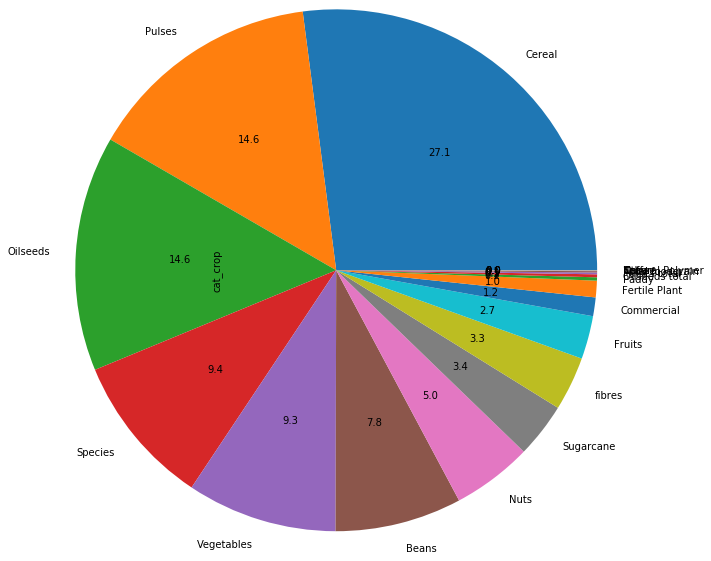

In [37]:
df1=df["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

Feature Selection

In [38]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [39]:
#Dummy variables shows the presence of a particular instance in that particular row. 
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [41]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,1.486087e-06,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,5.829598e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,1.452087e-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,4.646678e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,6.729184e-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# RandomForest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\VIVEK\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.9980456712268128


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [45]:
print(f"Train score : {model.score(x_train,y_train)}")
print(f"predict score : {model.score(x_train,y_train)}")
y_Rf=model.predict(x_test)

Train score : 1.0
predict score : 1.0


In [46]:
from sklearn.metrics import r2_score
rl = r2_score(y_test,preds)
print(rl)

1.0


One-Hot Encoding

In [47]:
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Goa,State_Name_Gujarat,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(162381, 165)
(3730, 92)


In [49]:
def cm(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set) 

In [92]:
preds

array([826.617     ,  11.22144156, 849.91      , ..., 280.6021    ,
       369.2778    ,   1.075     ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train[comfea],y_train)
preds = model.predict(y_test[cm])

In [94]:
test["production"] = preds

In [95]:
test[:15]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,826.617000
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,11.221442
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,849.910000
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,865.080000
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,3.881667
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,14.855698
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,2.908000
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,1.964600
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,849.910000
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,888.360000
